# Online Shoppers Purchasing Behavior

Online shopping behavior is the process by which consumers search for, select, purchase, use, and dispose of goods and services, over the internet. 

For the ecommerce platform, one of the most important questions is, whether the customer is just browsing or actually buying.  
Customers are very heterogenous so it is important the sellers do not treat them in the same way. They always want to leverage their resources to find and keep the customers in which they have confidence that they can more likely to purchase.  
The sellers could take some proactive action, like time-limited coupons or free trials, to push customers to purchase.  
By targeting the right customers the sellers could improve retention and increase sales and profits.

In this project we will be doing an intensive analysis of consumer behavioral and performing the following tasks:
1. Classification (EDA and Modelling)
2. Customer Segmentation
3. Semi-Supervised Learning


## Data

#### Data Set Information

* The source of the data in the project is [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset).  
* The dataset was collected from an online bookstore. It consists of feature vectors belonging to 12,330 sessions.  
* It was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

#### Attribute Information

There are 10 numerical and 8 categorical attributes in the dataset.

- Variable `Revenue` is the target label. This binary variable is imbalanced, specifically 84.5% of user journeys did NOT result in a purchase; in other words `Revenue` is False.
- `Administrative` - Number of pages visited by the user in that session for user account management related activities.
- `Administrative_Duration` - Total time spent on Admin pages by the user.
- `Informational` - Number of pages visited by the user in that session about the website.
- `Informational_Duration` - Total time spent on Informational pages by the user.
- `ProductRelated` - Number of product related pages visited by the user in that session.
- `ProductRelated_Duration` - Total time spent on Product related pages by the user.
  - The values of the above features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.
- `BounceRates` - Average bounce rate of the pages visited by the user. It represents the percentage of visitors who enter the site and then leave (i.e., bounce) without triggering any other requests to the analytics server during that session.
- `ExitRates` - Average exit rate of the pages visited by the user. It is the percentage of people who left the site from that page.
- `PageValues` - Average page value of the pages visited by the user. It is the average value for a page that a user visited before landing on the goal page or completing an e-ommerce transaction (or both).
  -  Three features above represent the metrics measured by Google Analytics for each page in the e-commerce site.
- `SpecialDay` - Indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
- `Month` - A Boolean value indicating whether the date of the visit is the month of the year.
- `OperatingSystems` - Operating Systems of the visitor.
- `Browser` - Browser of the visitor.
- `Region` - Geographic region from which the session has been started by the visitor.
- `TrafficType` - Traffic source through which user has entered the website.
- `VisitorType` - Defines the visitor type as returning or new visitor.
- `Weekend` - A Boolean value indicating whether the date of the visit is weekend.

## Dependencies

# 1. Classification

## Exploratory Data Analysis (EDA)

**Importing the dataset**

In [2]:
# Load the dataset
df = pd.read_csv('dat/online_shoppers_intention.csv.gz')
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [3]:
print(f'Dataframe dimensions: {df.shape}')

Dataframe dimensions: (12330, 18)


In [4]:
# List names of the columns
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

Checking dataframe information - count of entries, columns datatypes

In [5]:
# Count and dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Confirming that there are no missing values.

In [6]:
# Checking for missing values (nulls)
df.isnull().sum().sum()

0

#### Distributions of the Target Feature

Plot class distribution for our target variable, `Revenue`.

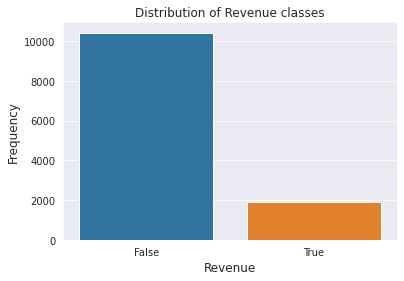

In [7]:
# Class distribution for Revenue - our target variable
sns.countplot(x='Revenue', data=df)
plt.title('Distribution of Revenue classes')
plt.xlabel('Revenue', size=12)
plt.ylabel('Frequency', size=12)

plt.show()

Let's define a small helper funtcion which displays count and percentage per class of one feature.

In [8]:
# Function to display count and percentage per class of target feature
def class_count(ser):
    counter=Counter(ser)
    ser_name = ser.name
    kv=counter.items()
    dff = pd.DataFrame(kv, columns=[ser_name,'Count'])
    dff['Count'] = dff['Count'].astype('int64')
    dff['%'] = round(dff['Count'] / ser.shape[0] * 100, 2)
    dff.sort_values('Count',ascending=False)
    print(dff.to_string(index=False))

And now let's run the above function and display <code style="color:steelblue">Revenue</code> distribution:

In [9]:
class_count(df.Revenue)

 Revenue  Count     %
   False  10422 84.53
    True   1908 15.47


In our dataset only 15.47% journeys resulted in a purchase --> this variable is imbalanced.

#### Distributions of Numeric Features

Plotting the histogram grid

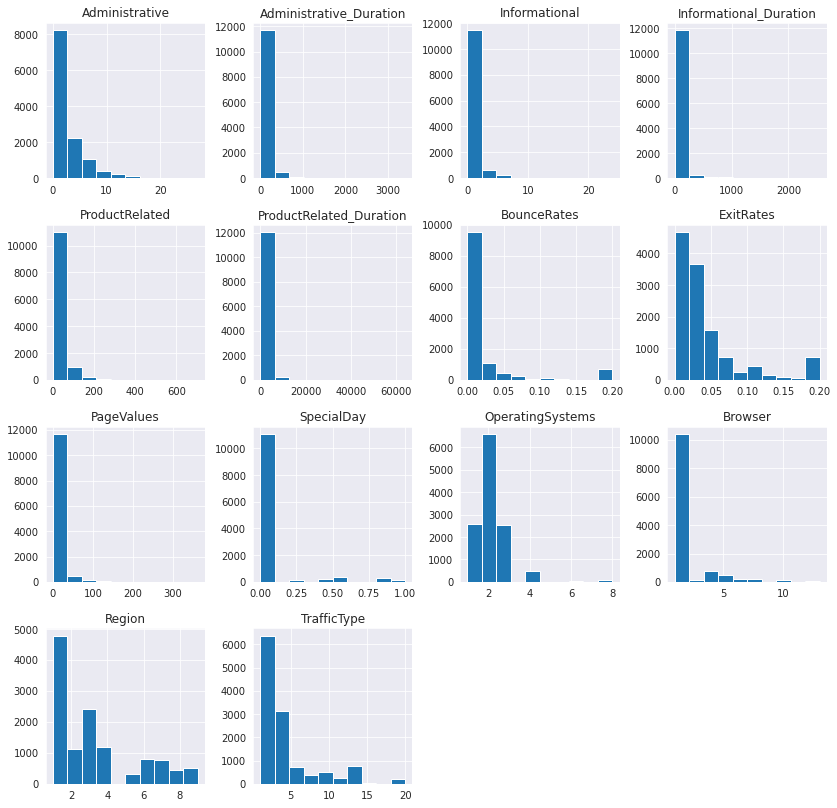

In [10]:
# Plot histogram grid
df.hist(figsize=(14,14))

plt.show()

#### Summary statistics for the numeric features

In [11]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

From the summary statistics and the histograms we can conclude that almost all features are right skewed (positive skewnwss --> mean > median) with long tails. This is pretty common in e-commerce setting where some users might have extremely high usage statistics.

#### Distributions of Categorical Features

In [12]:
# Summarize categorical features
df.describe(exclude=[np.number])

Month        VisitorType Weekend Revenue
count   12330              12330   12330   12330
unique     10                  3       2       2
top       May  Returning_Visitor   False   False
freq     3364              10551    9462   10422

- only 10 months in the dataset and most sessions were in May.
- There are three visitor types and the top one (majority of sessions) is Returning_Visitor.
- Most seesions are on weekdays, only ~ 23% on weekend.

Let's look at this in more details.

##### Categorical Feature Month

Create dictionary to help us sorting by month name.

In [13]:
month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

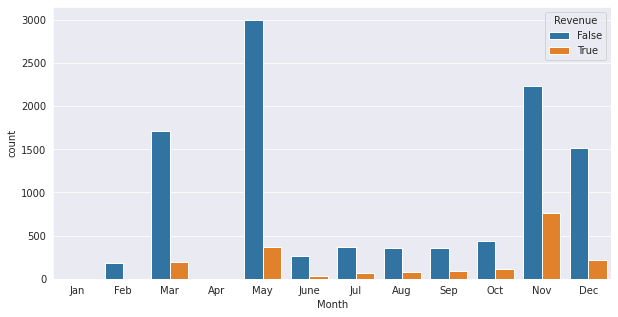

Counter({'Feb': 184,
         'Mar': 1907,
         'May': 3364,
         'June': 288,
         'Jul': 432,
         'Aug': 433,
         'Sep': 448,
         'Oct': 549,
         'Nov': 2998,
         'Dec': 1727})

In [14]:
# Countplot for Month
plt.figure(figsize=(10, 5))
sns.countplot(x='Month', data=df, hue='Revenue', order=month_dict.keys())
plt.show()

# Display count of each class
Counter(df.Month.sort_values(key=lambda x: x.apply(lambda x: month_dict[x])))

- From above we can see that there are only 10 months in the dataset; Jan and Apr are missing.
- The number of sessions is the highest in May.
- In November we see almost the same number of sessions, but November has the highest number of sessions completed with a purchase.

##### Categorical Feature VisitorType

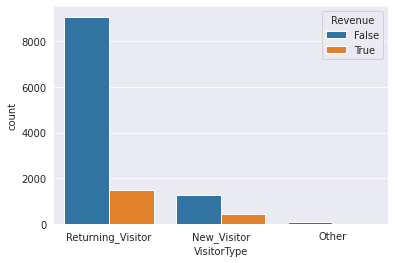

Counter({'Returning_Visitor': 10551, 'New_Visitor': 1694, 'Other': 85})

In [15]:
# Countplot for VisitorType
sns.countplot(x='VisitorType', data=df, hue='Revenue')
plt.show()

# Display count of each class
Counter(df.VisitorType)

Majority of visitors are returning visitors and only few others.

Categorical Feature Weekend

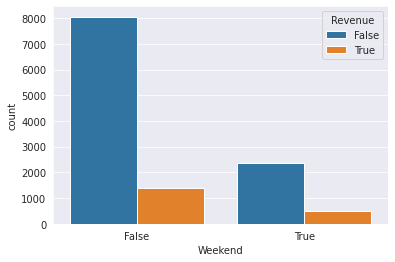

Counter({False: 9462, True: 2868})

In [16]:
# Countplotplot for Weekend
sns.countplot(x='Weekend', data=df, hue='Revenue')
plt.show()

# Display count of each class
Counter(df.Weekend)

Most of the sessions were on weekdays.

SpecialDay feature

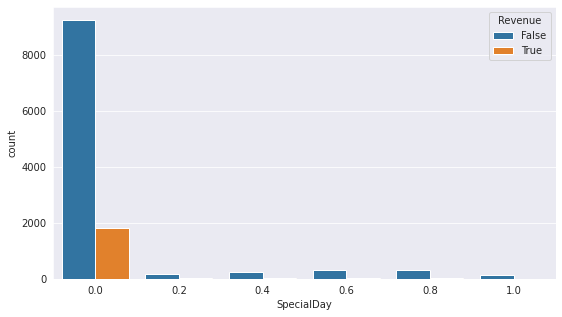

Counter({0.0: 11079, 0.4: 243, 0.8: 325, 1.0: 154, 0.2: 178, 0.6: 351})

In [17]:
# Countplot for SpecialDay
plt.figure(figsize=(9, 5))
sns.countplot(x='SpecialDay', data=df, hue='Revenue')
plt.show()

# Display count of each class
Counter(df.SpecialDay)

Percentage of sessions around special days is very small.

### Correlations

In [18]:
# Calculate correlations between numeric features
correlations = df.corr()

# sort features in order of their correlation with 'Revenue'
sort_corr_cols = correlations.Revenue.sort_values(ascending=False).keys()
sort_corr = correlations.loc[sort_corr_cols,sort_corr_cols]
sort_corr

Revenue  PageValues  ProductRelated  \
Revenue                  1.000000    0.492569        0.158538   
PageValues               0.492569    1.000000        0.056282   
ProductRelated           0.158538    0.056282        1.000000   
ProductRelated_Duration  0.152373    0.052823        0.860927   
Administrative           0.138917    0.098990        0.431119   
Informational            0.095200    0.048632        0.374164   
Administrative_Duration  0.093587    0.067608        0.289087   
Informational_Duration   0.070345    0.030861        0.280046   
Weekend                  0.029295    0.012002        0.016092   
Browser                  0.023984    0.045592       -0.013146   
TrafficType             -0.005113    0.012532       -0.043064   
Region                  -0.011595    0.011315       -0.038122   
OperatingSystems        -0.014668    0.018508        0.004290   
SpecialDay              -0.082305   -0.063541       -0.023958   
BounceRates             -0.150673   -0.119386       -0.204578   
ExitRates               -0.207071   -0.174498       -0.292526   

                         ProductRelated_Duration  Administrative  \
Revenue                                 0.152373        0.138917   
PageValues                              0.052823        0.098990   
ProductRelated                          0.860927        0.431119   
ProductRelated_Duration                 1.000000        0.373939   
Administrative                          0.373939        1.000000   
Informational                           0.387505        0.376850   
Administrative_Duration                 0.355422        0.601583   
Informational_Duration                  0.347364        0.255848   
Weekend                                 0.007311        0.026417   
Browser                                -0.007380       -0.025035   
TrafficType                            -0.036377       -0.033561   
Region                                 -0.033091       -0.005487   
OperatingSystems                        0.002976       -0.006347   
SpecialDay                             -0.036380       -0.094778   
BounceRates                            -0.184541       -0.223563   
ExitRates                              -0.251984       -0.316483   

                         Informational  Administrative_Duration  \
Revenue                       0.095200                 0.093587   
PageValues                    0.048632                 0.067608   
ProductRelated                0.374164                 0.289087   
ProductRelated_Duration       0.387505                 0.355422   
Administrative                0.376850                 0.601583   
Informational                 1.000000                 0.302710   
Administrative_Duration       0.302710                 1.000000   
Informational_Duration        0.618955                 0.238031   
Weekend                       0.035785                 0.014990   
Browser                      -0.038235                -0.015392   
TrafficType                  -0.034491                -0.014376   
Region                       -0.029169                -0.005561   
OperatingSystems             -0.009527                -0.007343   
SpecialDay                   -0.048219                -0.073304   
BounceRates                  -0.116114                -0.144170   
ExitRates                    -0.163666                -0.205798   

                         Informational_Duration   Weekend   Browser  \
Revenue                                0.070345  0.029295  0.023984   
PageValues                             0.030861  0.012002  0.045592   
ProductRelated                         0.280046  0.016092 -0.013146   
ProductRelated_Duration                0.347364  0.007311 -0.007380   
Administrative                         0.255848  0.026417 -0.025035   
Informational                          0.618955  0.035785 -0.038235   
Administrative_Duration                0.238031  0.014990 -0.015392   
Informational_Duration                 1.000000  0.0240

Let's use Seaborn's heatmap() function to visualize the correlation grid.

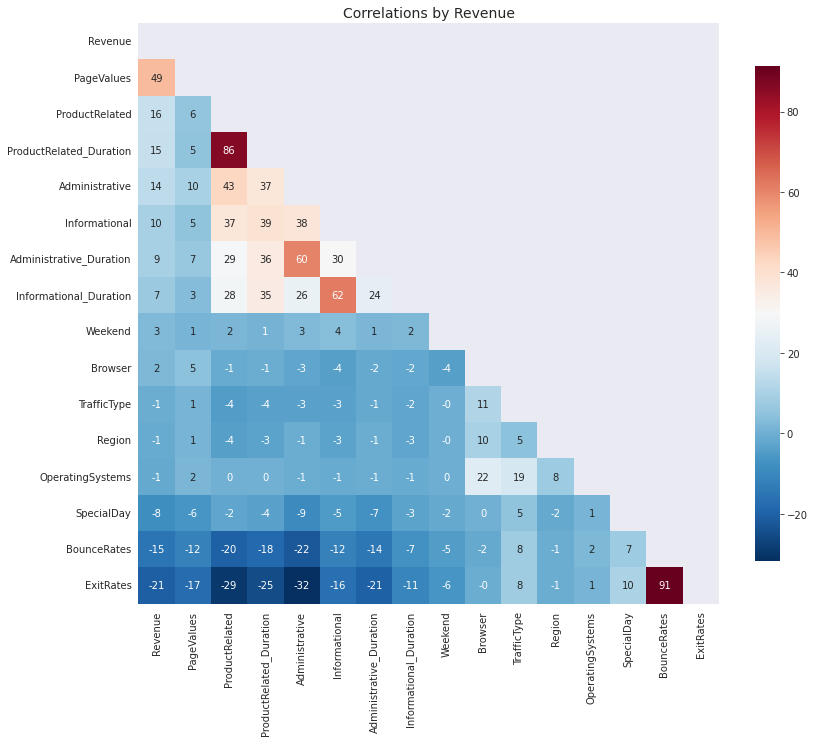

In [19]:
# Generate a mask for the upper triangle
corr_mask = np.zeros_like(correlations)
corr_mask[np.triu_indices_from(corr_mask)] = 1

# Make the figsize
plt.figure(figsize=(13, 13))

# Plot heatmap of annotated correlations
sns.heatmap(sort_corr*100, 
            cmap='RdBu_r', 
            annot=True,
            fmt='.0f',
            mask=corr_mask,
            square=True,
            cbar=True,
            cbar_kws={"shrink": .70})
    
plt.title('Correlations by Revenue', fontsize=14)
plt.yticks(rotation=0)

plt.show()


- `Revenue` is positively correlated with `PageViews`.  
- `ExitRates` has very high positive correlation with `BounceRates`.  High `ExitRates` or `BounceRates` indicate a less engaged user, resulting in fewer purchase conversions.
- The same is for `ProductRelated` and `ProductRelated_Duration`.
- Majority of correlations is slighly ngative.


### Pairplot

Let's use Seaborn's <code>.pairplot()</code> function for additional analysis.

It plots only numerical features and we will use categorical feature of our target (`Revenue`) for coloring.

Let's use Seaborn's <code>.pairplot()</code> function for additional analysis.

It plots only numerical features and we will use categorical feature of our target (`Revenue`) for coloring.

Pairplot can not work with boolean features so we will transform `Revenue` and `Weekend` features from boolean into integer (binary). That way they will be also prepared for our later machine learning calculations. 

In [20]:
# Transforming boolean to int
dfb = df.copy()
dfb.Revenue = dfb.Revenue.astype('int')
dfb.Weekend = dfb.Weekend.astype('int')
dfb.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor        0        0  
1        2       1            2  Returning_Visitor        0        0  
2        1       9            3  Returning_Visitor        0        0  
3        2       2            4  Returning_Visitor        0        0  
4        3       1            4  Returning_Visitor        1        0

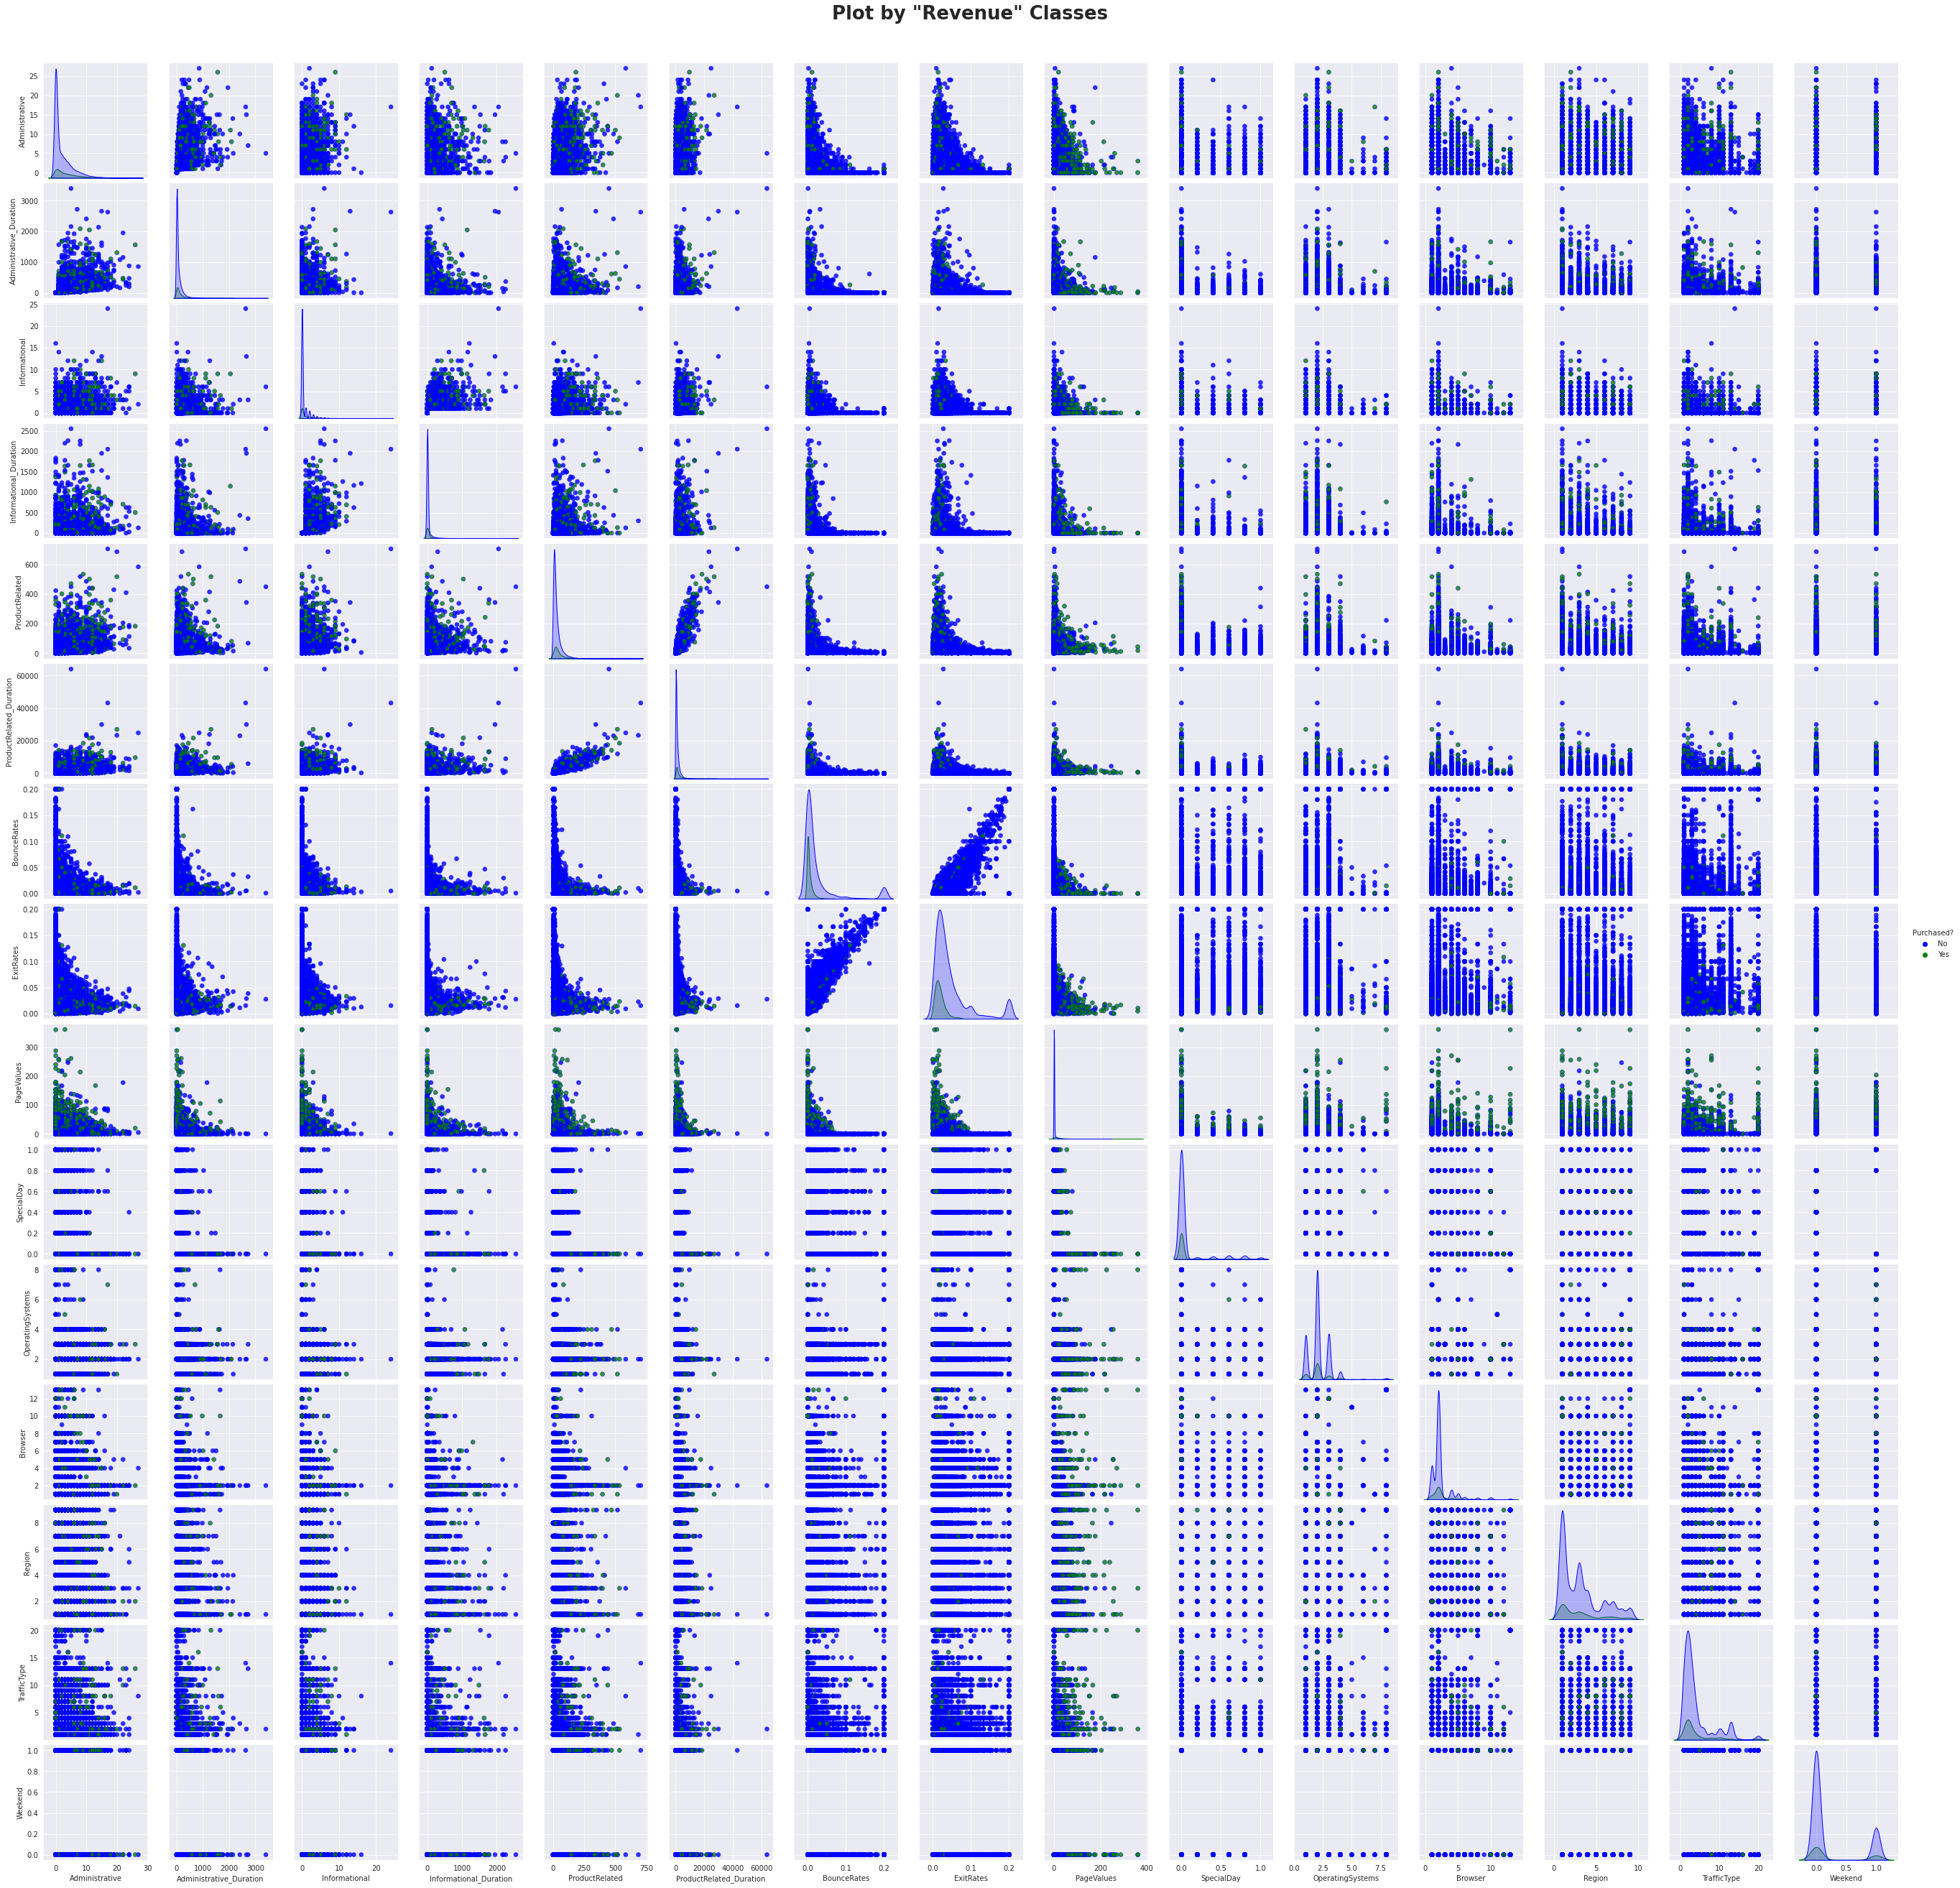

In [21]:
# Plot Seaborn's pairplot
g = sns.pairplot(dfb, hue='Revenue',
                 palette={ 1 : 'green',
                           0 : 'blue'},
                 plot_kws={'alpha' : 0.8, 'edgecolor' : 'b', 'linewidth' : 0.5})

fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Plot by "Revenue" Classes', 
             fontsize=26, 
             fontweight='bold')


# Update the legend
new_title = 'Purchased?'
g._legend.set_title(new_title)
# replace labels
new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.savefig("./pairplot_big.png")  
plt.show()

We have saved the plot so we could analyze it out of the notebook with any picture viewer.

  

Let’s reduce the clutter by plotting only four features: 





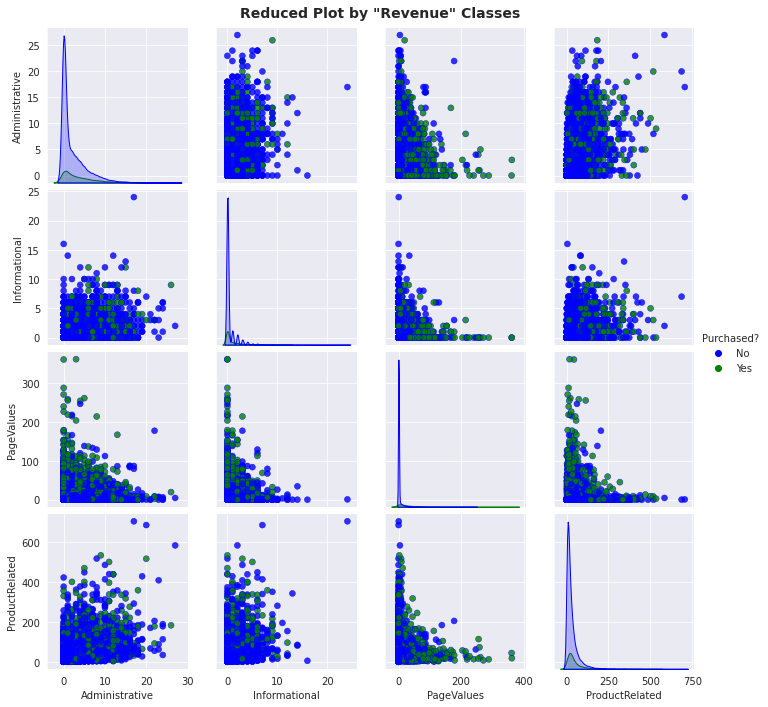

In [21]:
# Plot Seaborn's pairplot
g = sns.pairplot(dfb, hue='Revenue',
                 vars=['Administrative', 'Informational', 'PageValues','ProductRelated'],
                 palette={ 1 : 'green',
                           0 : 'blue'},
                 plot_kws={'alpha' : 0.8, 'edgecolor' : 'b', 'linewidth' : 0.5})

fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Reduced Plot by "Revenue" Classes', 
             fontsize=14, 
             fontweight='bold')


# Update the legend
new_title = 'Purchased?'
g._legend.set_title(new_title)
# replace labels
new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

#plt.savefig("./pairplot_big.png")  
plt.show()

Pairplots are just confirming that majority of numeric features are right skewed.


##### Web Page Analytics - Part 1

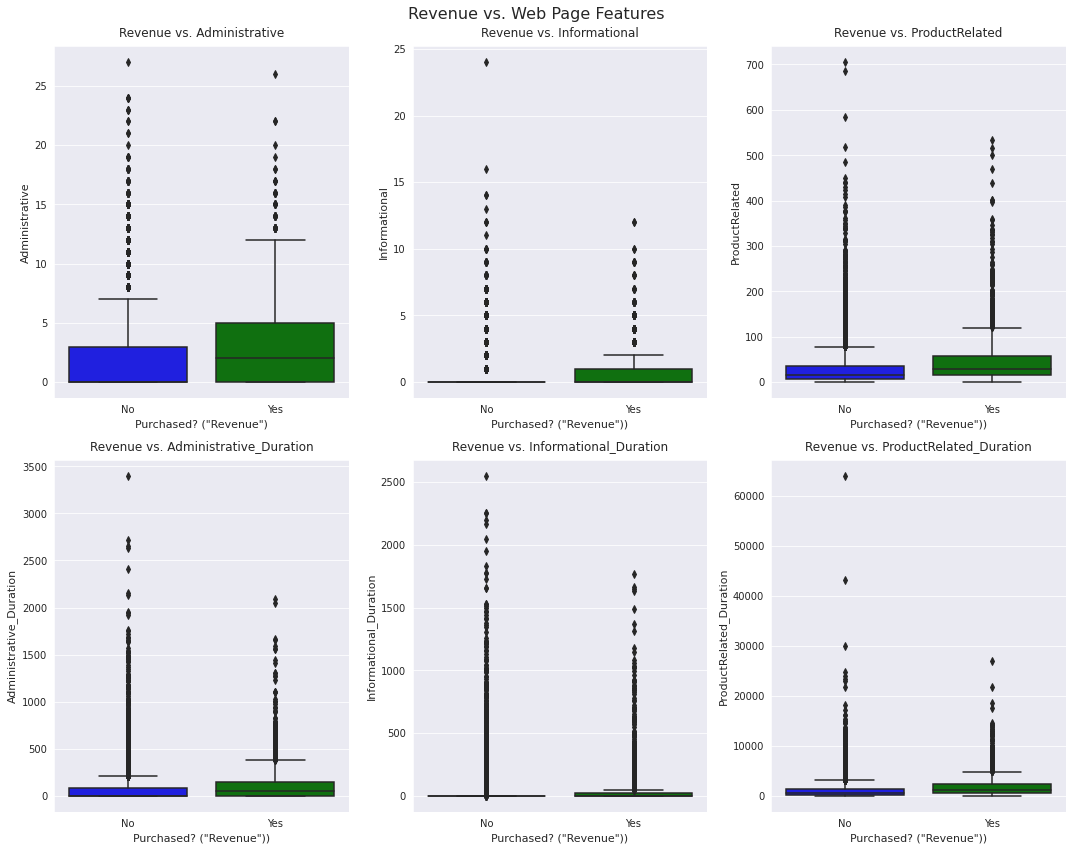

In [22]:
# Segment several features by Revenue and plot distributions
#  Previously Boolean variable Revenue is now numeric
#  for plotting purposes only we will change it to real categorical variable

# Define palette
my_pal = {'Yes': 'green', 'No': 'blue'}
# Convert to categorical
hr = {0: 'No', 1: 'Yes'}
purchase = dfb['Revenue'].map(hr)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 12))
fig.suptitle('Revenue vs. Web Page Features', fontsize=16)
fig.subplots_adjust(top=0.92, wspace=0.3, hspace=0.3)

sns.boxplot(x=purchase, y=dfb['Administrative'], order=['No', 'Yes'],palette=my_pal, ax=ax1)
ax1.set_title('Revenue vs. Administrative', fontsize=12, pad=10)
ax1.set_ylabel('Administrative',size=11)
ax1.set_xlabel('Purchased? ("Revenue")', size=11)

sns.boxplot(x=purchase, y=dfb['Informational'], order=['No', 'Yes'], palette=my_pal, ax=ax2)
ax2.set_title('Revenue vs. Informational', fontsize=12, pad=10)
ax2.set_ylabel('Informational',size=11)
ax2.set_xlabel('Purchased? ("Revenue"))', size=11)

sns.boxplot(x=purchase, y=dfb['ProductRelated'], order=['No', 'Yes'], palette=my_pal, ax=ax3)
ax3.set_title('Revenue vs. ProductRelated', fontsize=12, pad=10)
ax3.set_ylabel('ProductRelated',size=11)
ax3.set_xlabel('Purchased? ("Revenue"))', size=11)

sns.boxplot(x=purchase, y=dfb['Administrative_Duration'], order=['No', 'Yes'], palette=my_pal, ax=ax4)
ax4.set_title('Revenue vs. Administrative_Duration', fontsize=12, pad=10)
ax4.set_ylabel('Administrative_Duration',size=11)
ax4.set_xlabel('Purchased? ("Revenue"))', size=11)

sns.boxplot(x=purchase, y=dfb['Informational_Duration'], order=['No', 'Yes'], palette=my_pal, ax=ax5)
ax5.set_title('Revenue vs. Informational_Duration', fontsize=12, pad=10)
ax5.set_ylabel('Informational_Duration',size=11)
ax5.set_xlabel('Purchased? ("Revenue"))', size=11)

sns.boxplot(x=purchase, y=dfb['ProductRelated_Duration'], order=['No', 'Yes'], palette=my_pal, ax=ax6)
ax6.set_title('Revenue vs. ProductRelated_Duration', fontsize=12, pad=10)
ax6.set_ylabel('ProductRelated_Duration',size=11)
ax6.set_xlabel('Purchased? ("Revenue"))', size=11)

#plt.savefig("Images/violin_plots.png")
plt.tight_layout()
plt.show()

The above box plots are telling us:  
- Visitors visit less pages and spent less time if they are not going to make a purchase.
- They are visiting much higher number of product related pages and spend more time on them than for informational and account realted pages. 


##### Web Page Analytics - Part 2

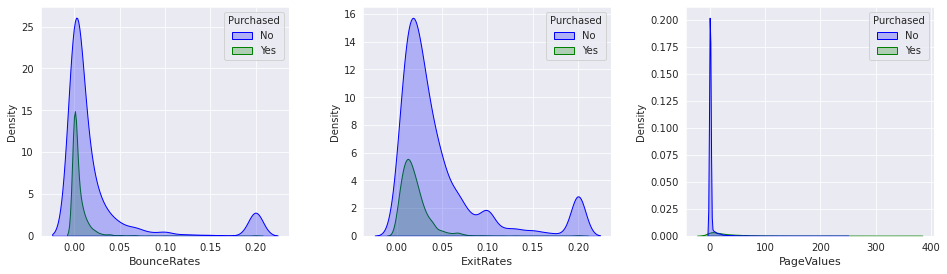

In [23]:
# Segment several features by Revenue and plot distributions
#  Previously Boolean variable Revenue is now numeric
#  for plotting purposes only we will change it to real categorical variable
# Define palette
my_pal = {'Yes': 'green', 'No': 'blue'}
# Convert to categorical
hr = {0: 'No', 1: 'Yes'}
purchase = dfb['Revenue'].map(hr).rename('Purchased')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
fig.subplots_adjust(top=0.92, wspace=0.3, hspace=0.3)

sns.kdeplot(x=dfb['BounceRates'], hue=purchase, palette=my_pal, shade=True, ax=ax1)
ax1.set_xlabel('BounceRates',size=11)

sns.kdeplot(x=dfb['ExitRates'], hue=purchase, palette=my_pal, shade=True, ax=ax2)
ax2.set_xlabel('ExitRates', fontsize=11)

sns.kdeplot(x=dfb['PageValues'], hue=purchase, palette=my_pal, shade=True, ax=ax3)
ax3.set_xlabel('PageValues', fontsize=11)

plt.show()

From the above visualizations we can conclude:  
- All 3 features are right skewed and do not follow a normal distribution.
- They all have a lot of outliers.
- The average bounce and exit rates of most of our data examples is low, which is good. High rates would indicate that visitors are not engaging with the website and leaving before making a purchase.



##### Visitor Analysis

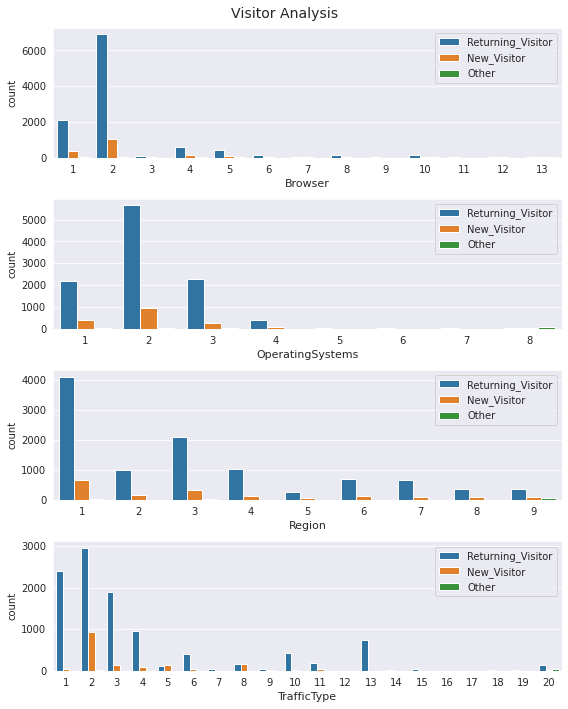

In [24]:
# Visitor Analysis

# Define palette
my_pal = 'tab10'

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 10))
fig.suptitle('Visitor Analysis', fontsize=14)
fig.subplots_adjust(top=0.92, wspace=0.3, hspace=0.3)

sns.countplot(data=df, x='Browser', hue='VisitorType', palette=my_pal, ax=ax1)
ax1.set_xlabel('Browser', size=11)
ax1.legend(loc='upper right')

sns.countplot(data=df, x='OperatingSystems', hue='VisitorType', palette=my_pal, ax=ax2)
ax2.set_xlabel('OperatingSystems', size=11)
ax2.legend(loc='upper right')

sns.countplot(data=df, x='Region', hue='VisitorType', palette=my_pal, ax=ax3)
ax3.set_xlabel('Region', size=11)
ax3.legend(loc='upper right')

sns.countplot(data=df, x='TrafficType', hue='VisitorType', palette=my_pal, ax=ax4)
ax4.set_xlabel('TrafficType', size=11)
ax4.legend(loc='upper right')

plt.tight_layout()
plt.show()

- Visitors are predomonantly using one operating system and one browser. Few others have decent representation in our dataset and the rest are rarely used.
- Traffic types and regions are very diverse, with only few that did not contribute to the datset.


### Modelling

#### Preparing Data

We are going to start with the dataframe dfb. We have already transformed boolean features to integer. 

In [25]:
dfb.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                      int64
Revenue                      int64
dtype: object

Let's convert the non-numeric features `Month` and `VisitorType` to numeric.

For `Month` we will use already defined dictionary `month_dict`.

In [26]:
month_dict.values()

dict_values([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [27]:
dfb.Month = dfb.Month.replace(month_dict)

Converting `VisitorType` with Pandas `get_dummies()`.

In [28]:
dfb = pd.get_dummies(dfb, columns=['VisitorType'])

In [29]:
dfb.dtypes

Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
Month                              int64
OperatingSystems                   int64
Browser                            int64
Region                             int64
TrafficType                        int64
Weekend                            int64
Revenue                            int64
VisitorType_New_Visitor            uint8
VisitorType_Other                  uint8
VisitorType_Returning_Visitor      uint8
dtype: object

#### Remove highly correlated features

In [30]:
cor = dfb.corr()

Looking at each pair of features, and if they are highly correlated (at least 0.8), we won't include the second feature in the pair.

In [31]:
keep_columns = np.full(cor.shape[0], True)
for i in range(cor.shape[0] - 1):
    for j in range(i + 1, cor.shape[0] - 1):
        if (np.abs(cor.iloc[i, j]) >= 0.8):
            keep_columns[j] = False
selected_columns = dfb.columns[keep_columns]
dfb_r = dfb[selected_columns]

In [32]:
# List dropped columns
dropped_columns = dfb.columns[~keep_columns]
dropped_columns

Index(['ProductRelated_Duration', 'ExitRates'], dtype='object')

In [33]:
dfb_r.shape

(12330, 18)

As we have seen before, there are not so many correlated features. Our script removed only two columns, `ExitRates` and `ProductRelated_Duration`, and left their correlation pairs, `BounceRates` and `ProductRelated`.

### Train-test split

We will be using data entries corresponding to the months of June—December as training set, and those corresponding to February—March as test set.

In [35]:
X_train = dfb_r[dfb_r.Month.isin([6, 7, 8, 9, 10, 11, 12])].drop('Revenue', axis=1)
X_test = dfb_r[dfb_r.Month.isin([2, 3])].drop('Revenue', axis=1)
y_train = dfb_r[dfb_r.Month.isin([6, 7, 8, 9, 10, 11, 12])].Revenue
y_test = dfb_r[dfb_r.Month.isin([2, 3])].Revenue


In [36]:
# Print the shapes
print('\n', X_train.shape, y_train.shape, '\n', X_test.shape, y_test.shape)


 (6875, 17) (6875,) 
 (2091, 17) (2091,)


### Build logistic regression model

##### Make pipeline, fit the model and predict the outputs

In [37]:
# Make the pipeline
lr_pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(class_weight='balanced',
                                           solver='saga',
                                           max_iter=5000, 
                                           random_state=10))


In [38]:
# Fit the model and predict
lr_model = lr_pipeline.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

We will be using `target_names` variable several times through the notebook.

In [44]:
target_names = ['No Purchase', 'Purchase']

In this notebook I will be using normalized confusion matrix. It will be very helpful due to nature of our dataset, it is imbalanced.

`cm_cr` is a helper function which we use to print confusion matrix and its normalized version side by side. By default it will print classification report as well, but that could be turned off if we want.


In [45]:
# Function to print confusion matrix and classification report
def cm_cr(model_name, y_test, y_pred, target_names, cr=True):
    print('\t\t\t', model_name)
    print('\t\t\t', '='*len(model_name))
    
    # Display confusion matrix for y_test and y_pred
    cm = confusion_matrix(y_test, y_pred)
    conf_df = pd.DataFrame(cm, columns=target_names, index=target_names)
    conf_df.index.name = 'True Labels'
    conf_df = conf_df.rename_axis('Predicted Labels', axis='columns')
    
    # Normalizwzed confusion matrix
    cm = np.around(cm / cm.sum(axis=1)[:, np.newaxis], 2)
    conf_dfn = pd.DataFrame(cm, columns=target_names, index=target_names)
    conf_dfn.index.name = 'True Labels'
    conf_dfn = conf_dfn.rename_axis('Predicted Labels', axis='columns')
  
    # Display dataframes side by side
    conf_df_styler = conf_df.style.set_table_attributes("style='display:inline'").set_caption('Confusion Matrix')
    conf_dfn_styler = conf_dfn.style.set_table_attributes("style='display:inline'").set_caption('Normalized Confusion Matrix').format(precision=2)
    
    space = "\xa0" * 15
    display_html(conf_df_styler._repr_html_() + space + conf_dfn_styler._repr_html_(), raw=True)
    
    if cr:
        # Display classification report
        print()
        print(classification_report(y_test, y_pred, target_names=target_names))
    print()

This is another helper function. It will plot confusion matrix heatmap and its normalized version.

In [41]:
def plot_conf_mat_w_and_wo_norm(model_name, y_test, y_pred, target_names, color):
    # Plot confusion matrix heatmaps

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    f.suptitle(model_name, fontsize=14)
    f.subplots_adjust(top=0.85, wspace=0.3)

    # confusion matrix without normalization
    mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(mat,
                annot=True,
                annot_kws=dict(fontsize=14),
                fmt='d',
                cbar=True,
                square=True,
                cmap=color,
                linecolor='red',
                linewidth=0.01,
                ax=ax1)

    ax1.set_xticklabels(labels=target_names)
    ax1.set_yticklabels(labels=target_names, va='center')
    ax1.set_title('Confusion Matrix w/o Normalization')
    ax1.set_xlabel('Predicted Label', size=12)
    ax1.set_ylabel('True Label', size=12)

    # normalized confusion matrix
    matn = mat / mat.sum(axis=1)[:, np.newaxis]
    sns.heatmap(matn,
                annot=True,
                annot_kws=dict(fontsize=14),
                fmt='.2f',
                cbar=True,
                square=True,
                cmap=color,
                linecolor='red',
                linewidth=0.01,
                vmin = 0,
                vmax = 1,
                ax=ax2)

    ax2.set_xticklabels(labels=target_names)
    ax2.set_yticklabels(labels=target_names, va='center')
    ax2.set_title('Normalized Confusion Matrix')
    ax2.set_xlabel('Predicted Label', size=12)
    ax2.set_ylabel('True Label', size=12)

    plt.show()

In [42]:
# Print confusion matrix
cm_cr('Logistic Regression', y_test, y_pred, target_names)

			 Logistic Regression


Confusion Matrix 
 
 
 Predicted Labels 
 No Purchase 
 Purchase 
 
 
 True Labels 
   
   
 
 
 
 
 No Purchase 
 1813 
 83 
 
 
 Purchase 
 38 
 157 
 
 
 
               
 
 Normalized Confusion Matrix 
 
 
 Predicted Labels 
 No Purchase 
 Purchase 
 
 
 True Labels 
   
   
 
 
 
 
 No Purchase 
 0.96 
 0.04 
 
 
 Purchase 
 0.19 
 0.81


              precision    recall  f1-score   support

 No Purchase       0.98      0.96      0.97      1896
    Purchase       0.65      0.81      0.72       195

    accuracy                           0.94      2091
   macro avg       0.82      0.88      0.84      2091
weighted avg       0.95      0.94      0.94      2091




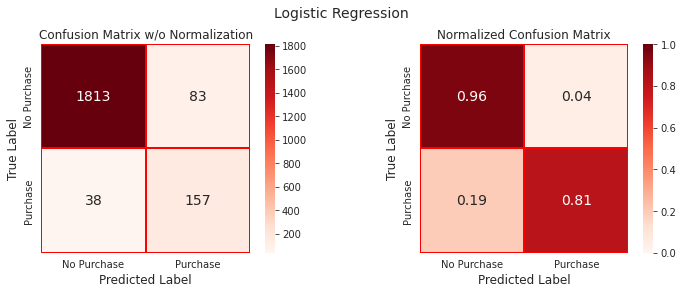

In [43]:
# # Plot confusion matrix
plot_conf_mat_w_and_wo_norm('Logistic Regression', y_test, y_pred, target_names, 'Reds')

This model gives a decent result but we would like to decrease false negative and increase recall.

### Build random forest model

##### Make pipeline, fit the model and predict the outputs

In [44]:
# Make pipeline
rf_pipeline = make_pipeline(StandardScaler(),
                        RandomForestClassifier(n_estimators=100, 
                                               max_depth=5,
                                               class_weight = 'balanced'))

In [45]:
# Fit the model and predict
rf_model = rf_pipeline.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [46]:
# Print confusion matrix
cm_cr('Random Forest', y_test, y_pred, target_names)

			 Random Forest


Confusion Matrix 
 
 
 Predicted Labels 
 No Purchase 
 Purchase 
 
 
 True Labels 
   
   
 
 
 
 
 No Purchase 
 1791 
 105 
 
 
 Purchase 
 0 
 195 
 
 
 
               
 
 Normalized Confusion Matrix 
 
 
 Predicted Labels 
 No Purchase 
 Purchase 
 
 
 True Labels 
   
   
 
 
 
 
 No Purchase 
 0.94 
 0.06 
 
 
 Purchase 
 0.00 
 1.00


              precision    recall  f1-score   support

 No Purchase       1.00      0.94      0.97      1896
    Purchase       0.65      1.00      0.79       195

    accuracy                           0.95      2091
   macro avg       0.82      0.97      0.88      2091
weighted avg       0.97      0.95      0.95      2091




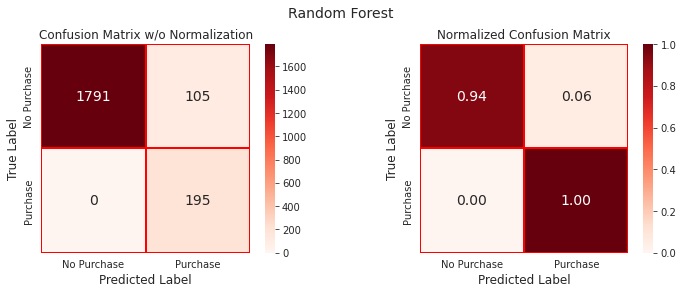

In [47]:
# Plot confusion matrix
plot_conf_mat_w_and_wo_norm('Random Forest', y_test, y_pred, target_names, 'Reds')

Suprisingly we have 100% recall. This looks too good to be true?!

#### Feature Importances - random forest

We will use a Random Forest to rank features based on a measure of importance called the Gini Importance.

In [48]:
# Print the features from pipeline
print(rf_pipeline[:-1].get_feature_names_out())

['Administrative' 'Administrative_Duration' 'Informational'
 'Informational_Duration' 'ProductRelated' 'BounceRates' 'PageValues'
 'SpecialDay' 'Month' 'OperatingSystems' 'Browser' 'Region' 'TrafficType'
 'Weekend' 'VisitorType_New_Visitor' 'VisitorType_Other'
 'VisitorType_Returning_Visitor']


In [49]:
print(rf_model)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=5))])


In [50]:
# Get the feature names from our pipeline
feature_names = rf_model.named_steps['standardscaler'].get_feature_names_out()

In [51]:
# Get the feature importances
feature_importances = rf_model.named_steps['randomforestclassifier'].feature_importances_

In [52]:
# Rank the features by importance
feat_imp = pd.Series(feature_importances,feature_names).sort_values(ascending=False)
feat_imp

PageValues                       0.654554
BounceRates                      0.091848
ProductRelated                   0.071917
Administrative                   0.044536
Month                            0.038133
Administrative_Duration          0.030324
Informational_Duration           0.011993
TrafficType                      0.011063
Informational                    0.009988
VisitorType_Returning_Visitor    0.009656
VisitorType_New_Visitor          0.007863
Region                           0.006451
OperatingSystems                 0.005656
Browser                          0.003554
Weekend                          0.001995
VisitorType_Other                0.000470
SpecialDay                       0.000000
dtype: float64

Plot feature importances

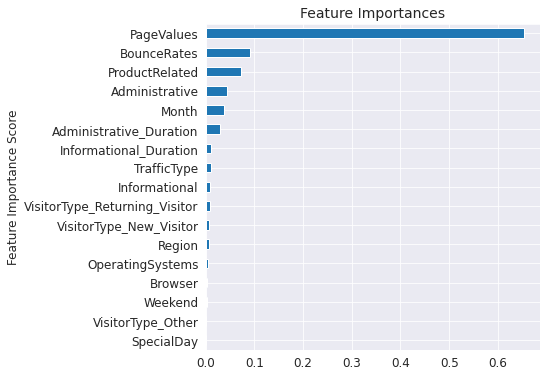

In [53]:
# Plot feature importances
plt.figure(figsize=(6,6))
# Reverse the order of features
feat_imp[::-1].plot(kind='barh', fontsize=12, )
plt.ylabel('Feature Importance Score', fontsize=12)
plt.title('Feature Importances', fontsize=14)
plt.show()

As we noticed earlier from correlations, `PageValues` is most important feature.



### Hyperparameter tuning for logistic regression

For hyperparameter tuning we will use sklearn's RandomizedSearch.

- First we will define the search space.  
- This is a dictionary where names are arguments to the model and values are distributions from which to draw samples. 
- We will optimize the penalty, and the C hyperparameters of the model with discrete distributions for the penalty type and a uniform distribution from 0 to 10 for the C value.


In [54]:
# Define search space
lr_space = {
    'logisticregression__C' : uniform(loc=0, scale=10),
    'logisticregression__penalty' : ['l1', 'l2']
}

- Next, we can define the search procedure with all of these elements.

- Importantly, we must set the number of iterations or samples to draw from the search space via the “n_iter” argument. In this case, we will set it to 50.

In [55]:
# Create the RandomizedSearchCV model 
lr_search = RandomizedSearchCV(lr_pipeline, 
                               lr_space, 
                               n_iter=50, 
                               scoring='recall', 
                               n_jobs=-1, 
                               random_state=10)

Finally, we can perform the optimization and report the results.

In [56]:
# Execute search - fit the model
lr_search.fit(X_train, y_train)

# Summarize result
print('Best Score: %s' % lr_search.best_score_)
print('Best Hyperparameters: %s' % lr_search.best_params_)

Best Score: 0.6721079443756024
Best Hyperparameters: {'logisticregression__C': 7.71320643266746, 'logisticregression__penalty': 'l1'}


In [57]:
# Compare training and testing scores
print(f"Training Data Score: {lr_search.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_search.score(X_test, y_test)}")

Training Data Score: 0.6691394658753709
Testing Data Score: 0.8051282051282052


In [58]:
# Prediction
y_pred = lr_search.predict(X_test)
print(f"First 10 Predictions:   {y_pred[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Print classification report and plot confusion matrix

In [59]:
# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 No Purchase       0.98      0.96      0.97      1896
    Purchase       0.65      0.81      0.72       195

    accuracy                           0.94      2091
   macro avg       0.82      0.88      0.84      2091
weighted avg       0.95      0.94      0.94      2091



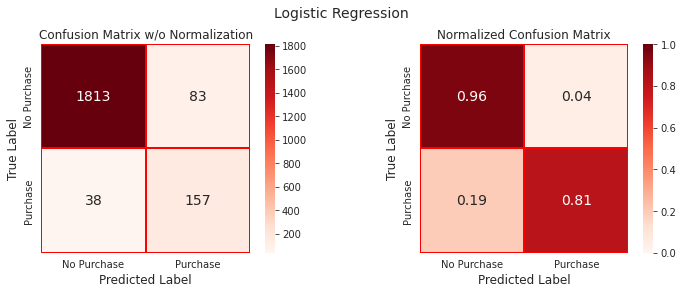

In [60]:
# Plot confusin matrix
plot_conf_mat_w_and_wo_norm('Logistic Regression', y_test, y_pred, target_names, 'Reds')

Hyperparameter tuning did not help.

### Explanability with SHAP

Getting feature names from the pipeline.

In [61]:
# Getting feature names from the pipeline
feature_names = lr_model.named_steps['standardscaler'].get_feature_names_out()
feature_names

array(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'Weekend', 'VisitorType_New_Visitor',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'], dtype=object)

##### Logistic Regression Model

Get the model from the pipeline

In [62]:
# Get the model from the pipeline
lrm = lr_model.named_steps['logisticregression']

In [63]:
# Run explainer and define shap_values
explainer = shap.Explainer(lrm, X_train, feature_names=feature_names)
shap_values_lr = explainer(X_train)

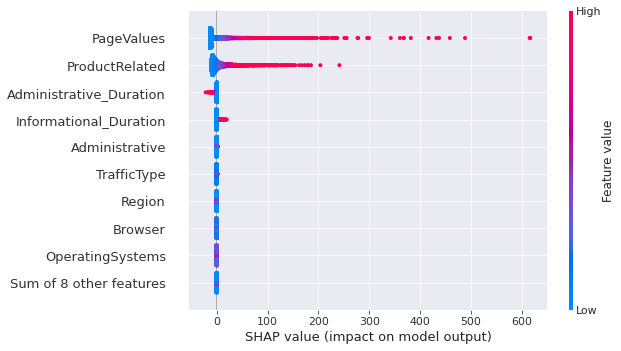

In [64]:
# SHAP beeswarm summary plot
shap.plots.beeswarm(shap_values_lr)

The SHAP beeswarm plot displays both feature importances and the efects on the predictions.
The features are sorted from top to down by the sum of SHAP value magnitudes of all instances.
The distribution of the impacts each feature has on the predictions is displayed along the x-axis.
The values of the features are represented by the color of dots: red high and blue low.

- For example, we can see that `PageValues` is the most important feature for our model. 
- The higher values of `PageValues` (red dots) tend to contribute positively to the prediction. 
- In comparison, the lower values (blue dots) of `Administrative_Duration` have negative contributions.
- Looks very similar to feauture importances from Random Forest model.


Create feature importance dataframe

In [65]:
# Feature importance dataframe
feature_importance_lr = pd.DataFrame({'Feature': feature_names, 'Importance': shap_values_lr.abs.sum(0).values})
feature_importance_lr = feature_importance_lr.sort_values(by='Importance', ascending=False).reset_index(drop=True)
feature_importance_lr 

Feature     Importance
0                      PageValues  130523.707670
1                  ProductRelated   75132.584288
2         Administrative_Duration    4349.345311
3          Informational_Duration    3445.568013
4                  Administrative    1360.481630
5                     TrafficType    1356.822686
6                          Region    1351.861777
7                         Browser     377.912267
8                OperatingSystems     373.704504
9                   Informational     237.205486
10        VisitorType_New_Visitor     167.275723
11                        Weekend     154.847901
12  VisitorType_Returning_Visitor     133.724734
13                    BounceRates      96.594383
14                          Month      88.501958
15              VisitorType_Other      13.760003
16                     SpecialDay       0.000000

##### Random Forest Model

Get the model from the pipeline

In [66]:
# Get the model from the pipeline
rfm = rf_model.named_steps['randomforestclassifier']

In [67]:
# Run explainer and define shap_values
explainer = shap.Explainer(rfm, X_train, feature_names=feature_names)
shap_values_rf = explainer(X_train)

100%|===================| 13687/13750 [00:13<00:00]        

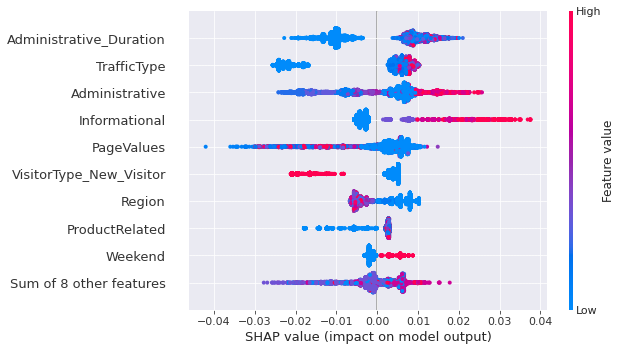

In [68]:
# SHAP beeswarm summary plot
shap.plots.beeswarm(shap_values_rf[:,:,0])

This is a pretty different plot than the one for Logistic Regression.   
`PageValues` is the most important feature for this model as well, but they slightly disagree on other features.


Create feature importance dataframe

In [69]:
# Feature importance dataframe
feature_importance_rf = pd.DataFrame({'Feature': feature_names, 'Importance': shap_values_rf[:,:,0].abs.sum(0).values})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False).reset_index(drop=True)
feature_importance_rf 

Feature  Importance
0         Administrative_Duration   70.273253
1                     TrafficType   63.511035
2                  Administrative   61.321713
3                   Informational   46.378757
4                      PageValues   45.700556
5         VisitorType_New_Visitor   43.807478
6                          Region   35.290257
7                  ProductRelated   25.393950
8                         Weekend   16.719659
9                OperatingSystems   16.232011
10         Informational_Duration   15.957361
11                        Browser   12.637780
12                    BounceRates    6.377215
13              VisitorType_Other    0.000000
14                          Month    0.000000
15                     SpecialDay    0.000000
16  VisitorType_Returning_Visitor    0.000000

# 2. Customer Segmentation

We will start with the dataframe `dfb_r` that is already converted to all numerical features and two highly correlated features were dropped.

In [70]:
print(dfb_r.dtypes)
print('\n', dfb_r.shape)

Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
BounceRates                      float64
PageValues                       float64
SpecialDay                       float64
Month                              int64
OperatingSystems                   int64
Browser                            int64
Region                             int64
TrafficType                        int64
Weekend                            int64
Revenue                            int64
VisitorType_New_Visitor            uint8
VisitorType_Other                  uint8
VisitorType_Returning_Visitor      uint8
dtype: object

 (12330, 18)


Let's scale it with MinMaxScaler.

In [71]:
scaler = MinMaxScaler()
scaler.fit(dfb_r)
scaled = scaler.transform(dfb_r)
dfb_r_scaled = pd.DataFrame(scaled, columns=dfb_r.columns)

Visualize the elbow plot

In [72]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots(figsize=(12, 8))
    inertias = []
    for k in ks:
        km = KMeans(n_clusters=k, random_state=10).fit(X)
        inertias.append(km.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Searching for Elbow')

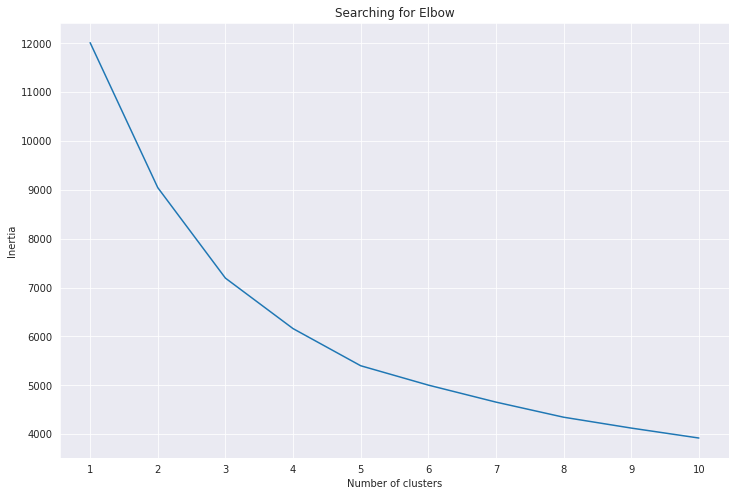

In [73]:
# Plot the elbow
visualize_elbow(dfb_r_scaled, range(1, 11))

We can select the cluster when there is a significant change in inertia. We can say his may be either 3 or 5.

Let's see both results in graph.

In [74]:
# from matplotlib import style
# style.use(['dark_background', 'seaborn-colorblind'])


#### KMeans - 3 Clusters

In [75]:
# 3 cluster
km3 = KMeans(n_clusters=3, random_state=10).fit(dfb_r_scaled)

In [76]:
df_c = df.copy()
df_c['clusters'] = km3.labels_

In [77]:
df_c.groupby('clusters').mean()

Administrative  Administrative_Duration  Informational  \
clusters                                                           
0               2.230308                77.614699       0.502935   
1               2.457514                84.139305       0.635412   
2               2.515581                91.165378       0.328045   

          Informational_Duration  ProductRelated  ProductRelated_Duration  \
clusters                                                                    
0                      34.785807       33.454256              1273.123138   
1                      44.937783       36.057346              1338.672642   
2                      18.855266       17.895751               636.870919   

          BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  \
clusters                                                                     
0            0.026093   0.048211    4.796834    0.070010          2.105308   
1            0.020884   0.041194    5.706418    0.063123          2.130180   
2            0.005886   0.021814   11.197168    0.019377          2.202266   

           Browser    Region  TrafficType   Weekend   Revenue  
clusters                                                       
0         2.341487  3.093077     4.012842  0.000000  0.131727  
1         2.235245  3.112181     4.079113  1.000000  0.164923  
2         2.594334  3.446459     4.319547  0.271388  0.247592

In [78]:
# Get thesize of clusters
df_c.clusters.value_counts()

0    8176
1    2389
2    1765
Name: clusters, dtype: int64

There is one big cluster and two smaller and relatively close in size.

<AxesSubplot:xlabel='VisitorType', ylabel='count'>

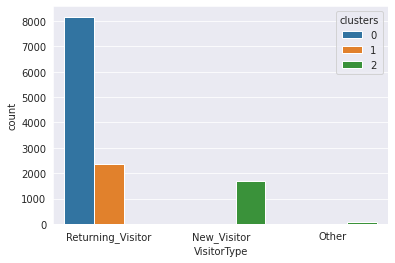

In [79]:
sns.countplot(x='VisitorType', data=df_c, hue='clusters')

In [80]:
df_c[['VisitorType', 'clusters']].value_counts()

VisitorType        clusters
Returning_Visitor  0           8169
                   1           2382
New_Visitor        2           1694
Other              2             71
                   0              7
                   1              7
dtype: int64

From above we can see that new visitors belong to cluster 2 only. Some of Other visitors also belong to cluster 2.

<AxesSubplot:xlabel='Revenue', ylabel='count'>

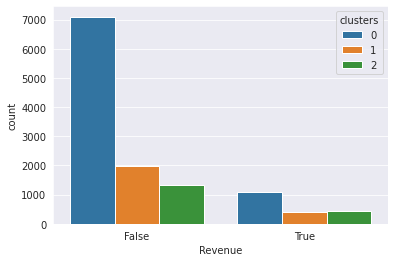

In [81]:
sns.countplot(x='Revenue', data=df_c, hue='clusters')

<AxesSubplot:xlabel='Weekend', ylabel='count'>

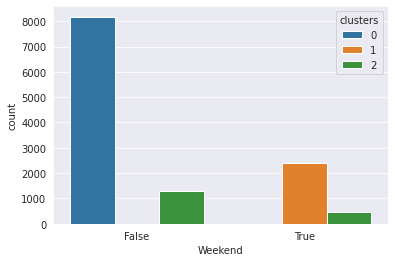

In [82]:
sns.countplot(x='Weekend', data=df_c, hue='clusters')

In [83]:
df_c[['Weekend', 'clusters']].value_counts()

Weekend  clusters
False    0           8176
True     1           2389
False    2           1286
True     2            479
dtype: int64

Cluster 0 only holds weekdays. Cluster 1 holds weekends only and cluster 2 holds the rest for both groups.

<AxesSubplot:xlabel='Region', ylabel='count'>

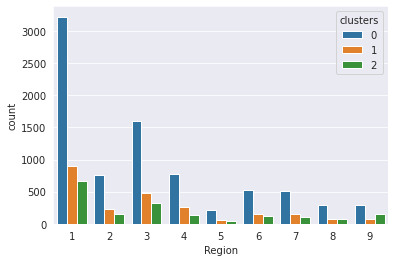

In [84]:
sns.countplot(x='Region', data=df_c, hue='clusters')

<AxesSubplot:xlabel='Month', ylabel='count'>

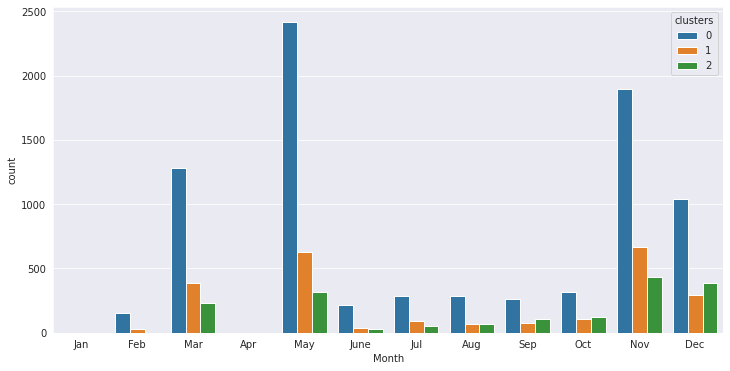

In [85]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=df_c, hue='clusters', order=month_dict)

<AxesSubplot:xlabel='Browser', ylabel='count'>

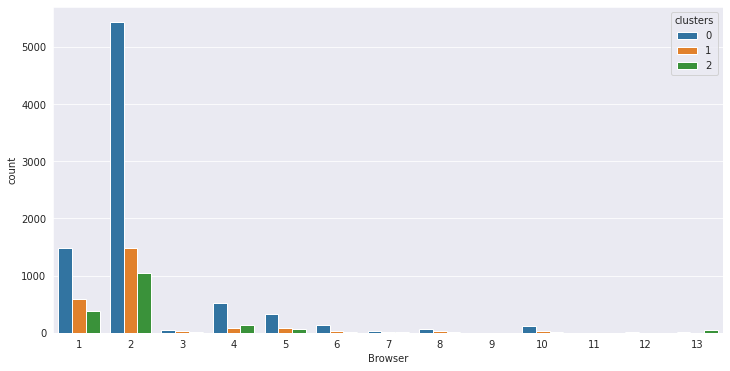

In [86]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Browser', data=df_c, hue='clusters')

In three above plots features are mostly proportionally spread over the clusters.

- As we noticed earlier, numerical features are right skewed so we can not see cluster separations.
- I tried to use logarithmic scales, but I got only more beatiful pictures.
- Data points are very dense.

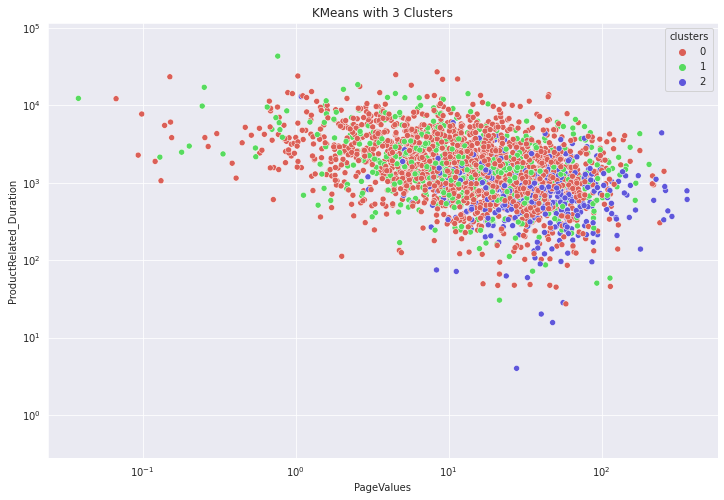

In [87]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_c['PageValues'], y=df_c['ProductRelated_Duration'], hue=df_c['clusters'],
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.show()

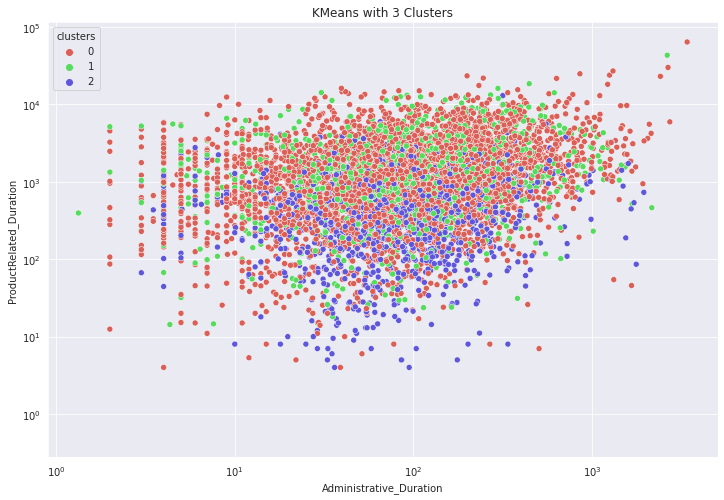

In [88]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_c['Administrative_Duration'], y=df_c['ProductRelated_Duration'], hue=df_c['clusters'],
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.show()

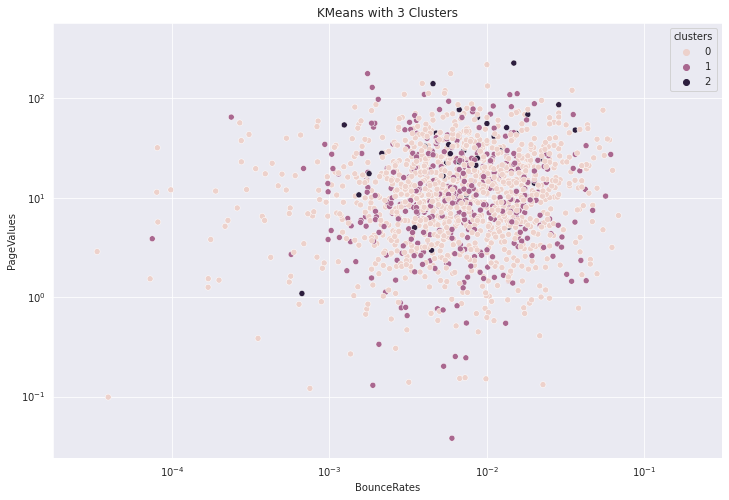

In [89]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_c['BounceRates'], y=df_c['PageValues'], hue=df_c['clusters'])
plt.title('KMeans with 3 Clusters')
plt.xscale('log')
plt.yscale('log')
plt.show()

#### KMeans - 5 Clusters

In [90]:
# 5 cluster
km5 = KMeans(n_clusters=5, random_state=10).fit(dfb_r_scaled)

In [91]:
df_c = df.copy()
df_c['clusters'] = km5.labels_

In [92]:
df_c.groupby('clusters').mean()

Administrative  Administrative_Duration  Informational  \
clusters                                                           
0               2.551948                91.911315       0.333530   
1               2.444162                83.894720       0.528236   
2               1.629778                56.464203       0.356732   
3               2.230576                78.413250       0.586466   
4               3.731494               130.483785       0.929341   

          Informational_Duration  ProductRelated  ProductRelated_Duration  \
clusters                                                                    
0                      19.237472       18.054900               636.393354   
1                      37.460583       36.397843              1393.941772   
2                      23.264748       24.326005               905.168140   
3                      39.934140       33.073684              1215.635183   
4                      68.360185       55.571332              2160.757625   

          BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  \
clusters                                                                     
0            0.005261   0.020681   10.772187    0.020189          2.027745   
1            0.024151   0.045918    2.731421    0.000000          2.177348   
2            0.032843   0.057256    1.596818    0.135898          2.117412   
3            0.023991   0.045408    1.931105    0.071579          2.133333   
4            0.006226   0.021220   23.897985    0.024495          2.125841   

           Browser    Region  TrafficType   Weekend   Revenue  
clusters                                                       
0         2.287485  3.272137     3.857143  0.282763  0.249115  
1         2.430203  3.237627     4.278236  0.000000  0.000000  
2         2.360979  3.090932     3.988009  0.000000  0.000000  
3         2.208020  3.104762     4.078195  1.000000  0.000000  
4         2.471063  3.022880     4.077389  0.265141  1.000000

In [93]:
# Get cluster sizes
df_c.clusters.value_counts()

2    4003
1    3152
3    1995
0    1694
4    1486
Name: clusters, dtype: int64

<AxesSubplot:xlabel='VisitorType', ylabel='count'>

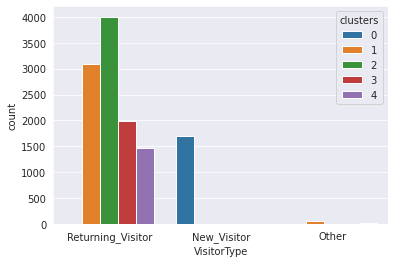

In [94]:
sns.countplot(x='VisitorType', data=df_c, hue='clusters')

In [95]:
df_c[['VisitorType', 'clusters']].value_counts()

VisitorType        clusters
Returning_Visitor  2           4002
                   1           3090
                   3           1989
New_Visitor        0           1694
Returning_Visitor  4           1470
Other              1             62
                   4             16
                   3              6
                   2              1
dtype: int64

New visitors are again nicely separated, they are all alone in the cluster 0.

<AxesSubplot:xlabel='Revenue', ylabel='count'>

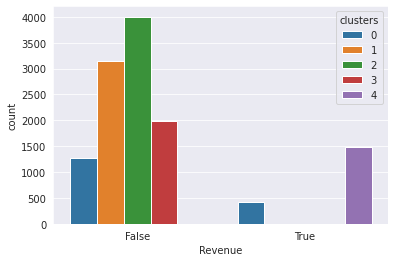

In [96]:
sns.countplot(x='Revenue', data=df_c, hue='clusters')

In [97]:
df_c[['Revenue', 'clusters']].value_counts()

Revenue  clusters
False    2           4003
         1           3152
         3           1995
True     4           1486
False    0           1272
True     0            422
dtype: int64

Cluster 4 holds only purchases and the rest of purchases are in the cluster 0.

<AxesSubplot:xlabel='Weekend', ylabel='count'>

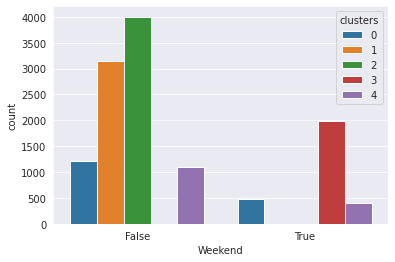

In [98]:
sns.countplot(x='Weekend', data=df_c, hue='clusters')

<AxesSubplot:xlabel='Region', ylabel='count'>

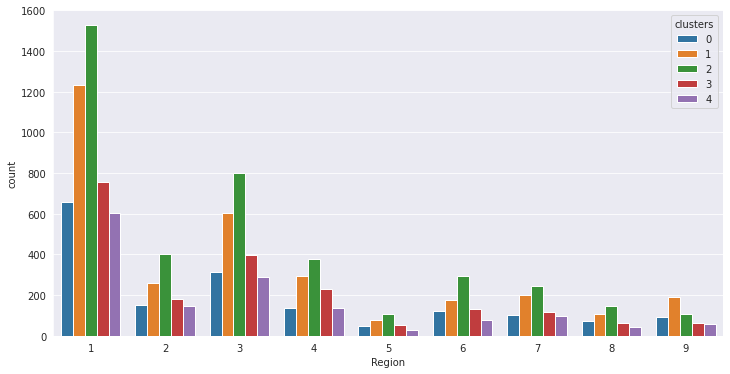

In [99]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Region', data=df_c, hue='clusters')

<AxesSubplot:xlabel='Month', ylabel='count'>

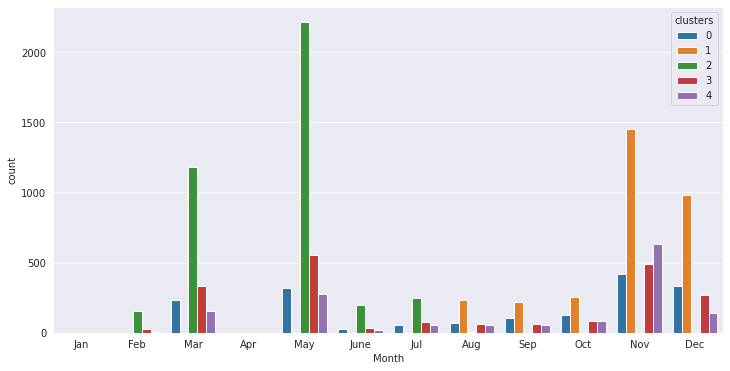

In [100]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=df_c, hue='clusters', order=month_dict)

<AxesSubplot:xlabel='Browser', ylabel='count'>

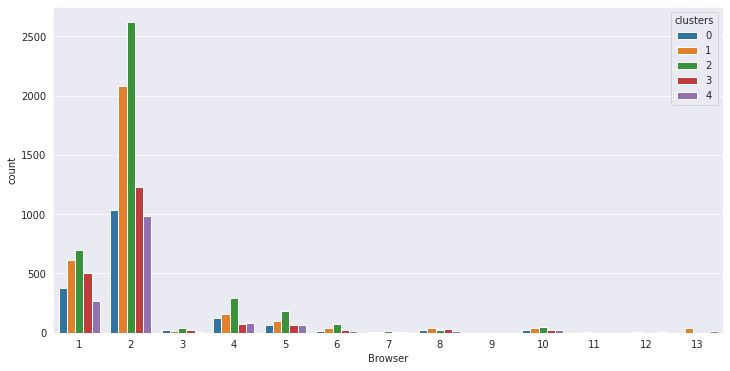

In [101]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Browser', data=df_c, hue='clusters')

Nothing interesting in above 4 plots.

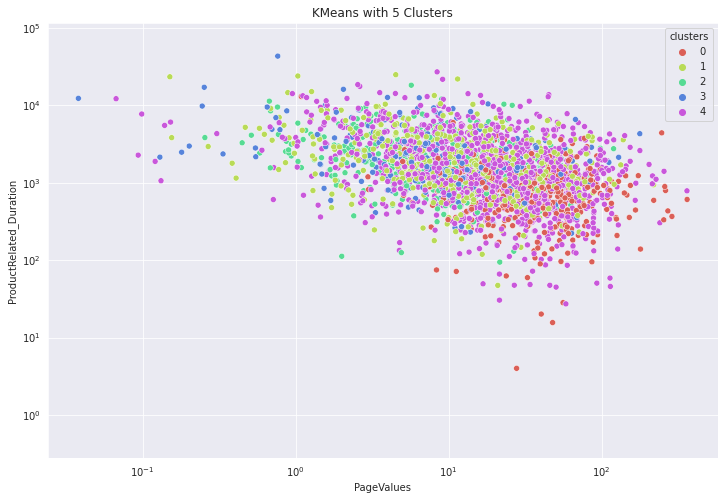

In [102]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_c['PageValues'], y=df_c['ProductRelated_Duration'], hue=df_c['clusters'],
                 palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.xscale('log')
plt.yscale('log')
plt.show()

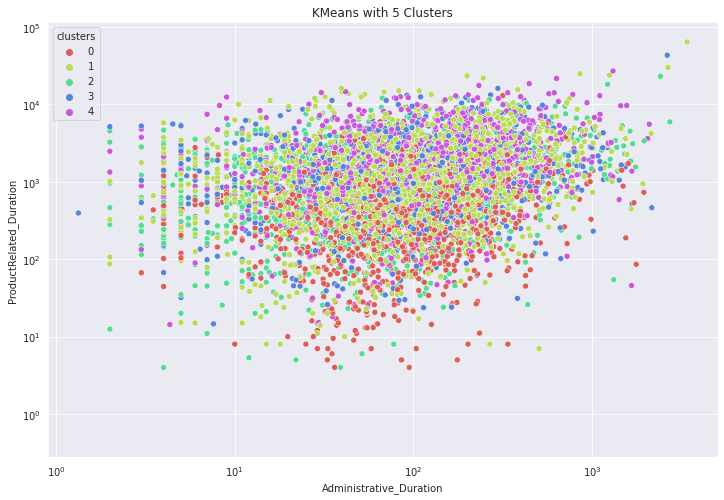

In [103]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_c['Administrative_Duration'], y=df_c['ProductRelated_Duration'], hue=df_c['clusters'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.xscale('log')
plt.yscale('log')
plt.show()

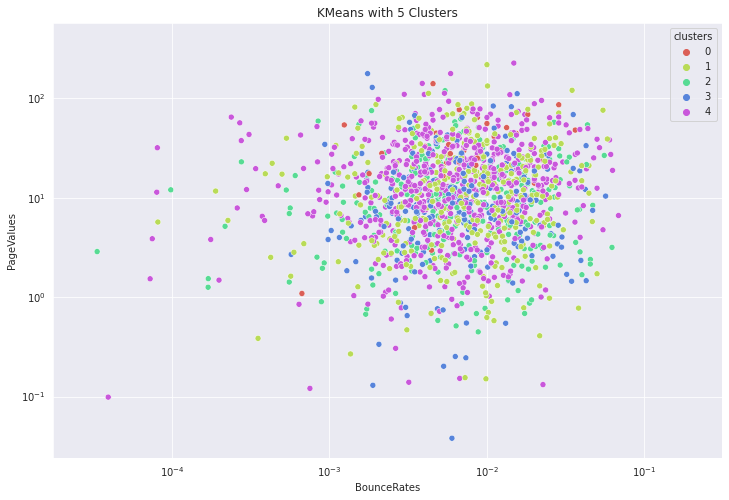

In [104]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_c['BounceRates'], y=df_c['PageValues'], hue=df_c['clusters'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.xscale('log')
plt.yscale('log')
plt.show()

#### KMeans - 2 Clusters

Let's just check a few features for 2 clusters.

In [105]:
# 2 cluster
km2 = KMeans(n_clusters=2, random_state=10).fit(dfb_r_scaled)

In [106]:
df_c = df.copy()
df_c['clusters'] = km2.labels_

In [107]:
df_c.groupby('clusters').mean()

Administrative  Administrative_Duration  Informational  \
clusters                                                           
0               2.283738                79.176135       0.533453   
1               2.501687                90.566306       0.326209   

          Informational_Duration  ProductRelated  ProductRelated_Duration  \
clusters                                                                    
0                      37.098476       34.079321              1289.299293   
1                      18.887258       17.797525               633.596600   

          BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  \
clusters                                                                     
0            0.024794   0.046519    5.005701    0.068537          2.109553   
1            0.006743   0.022619   11.132953    0.019235          2.209786   

           Browser    Region  TrafficType   Weekend   Revenue  
clusters                                                       
0         2.315485  3.097043     4.025967  0.225739  0.139310  
1         2.604049  3.446007     4.328459  0.273341  0.246344

In [108]:
df_c.clusters.value_counts()

0    10552
1     1778
Name: clusters, dtype: int64

We can see that most of the data is in the cluster 0.

<AxesSubplot:xlabel='VisitorType', ylabel='count'>

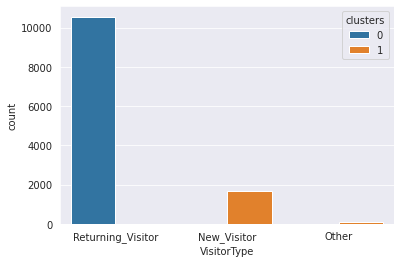

In [109]:
sns.countplot(x='VisitorType', data=df_c, hue='clusters')

In [110]:
df_c[['VisitorType', 'clusters']].value_counts()

VisitorType        clusters
Returning_Visitor  0           10551
New_Visitor        1            1694
Other              1              84
                   0               1
dtype: int64

This is one intersting plot. All returning visitors belong to the cluster 0 and new visitors to the cluster 1. All other visitors, except one, belong to ge cluster 1

For other features data samples are almost prportionally spread over two clusters.


# 3. Semi-Supervised Learning

The starting dataframe is `dfb_r` that is already converted to all numerical features and two highly correlated features were dropped.

- For the **training data** we will use records from June-September only, with the `Revenue` attribute
- For all records from October-December `Revenue` attribute is missing (we will drop it). 
  - We are going to build a semi-supervised self-labeling model to estimate `Revenue` for these records with  the missing `Revenue`.
- The **test data** contains all records from February-March.


We will generate and compare two classification reports:
1. For June-September labeled data as training data
2. For training data including June-September labeled data and October-December self-labeled data. 

### Train-test split

#### Prepare labeled data

In [34]:
# train-test split - labeled data
X_train_label = dfb_r[dfb_r.Month.isin([6, 7, 8, 9])].drop('Revenue', axis=1).values
X_test = dfb_r[dfb_r.Month.isin([2, 3])].drop('Revenue', axis=1).values

y_train_label = dfb_r[dfb_r.Month.isin([6, 7, 8, 9])].Revenue.values
y_test = dfb_r[dfb_r.Month.isin([2, 3])].Revenue.values

print(X_train_label.shape, y_train_label.shape)
print(X_test.shape, y_test.shape)

(1601, 17) (1601,)
(2091, 17) (2091,)


#### Prepare data for semi-supervised learning

Create a matrix X_train_sl that has the rows from June-December.

In [35]:
# Prepare X_train for self-labeled data
X_train_sl = dfb_r[dfb_r.Month.isin([6, 7, 8, 9, 10, 11, 12])].drop('Revenue', axis=1).values
print(X_train_sl.shape)

(6875, 17)


Create the target array y_sl by concatenating y_train_label with a vector of -1's, effectively creating a dummy label for rows October-December in X_train_sl. Check the shape of the resulting array. It should have as many values as X_train_sl has rows.

In [36]:
# Concatenating a vector of -1's with y_train_labels to create dummy labels
dummy_shape = dfb_r[dfb_r.Month.isin([10, 11, 12])].shape[0]
minus_ones = - np.ones((dummy_shape,), dtype=int)
y_sl = np.concatenate((y_train_label, minus_ones))

print(y_sl.shape)

(6875,)


Train a scikit-learn's `LabelSpreading` model with kNN.  
Set kernel to knn and alpha to 0.01.

In [37]:
# Train LabelSpreading
lsm = LabelSpreading(kernel='knn', alpha=0.01)
lsm.fit(X_train_sl, y_sl)

LabelSpreading(alpha=0.01, kernel='knn')

Extract the predictions from the `transduction_` attribute to y_train_sl array.

In [38]:
y_train_sl = lsm.transduction_
print(y_train_sl.shape)

(6875,)


##### Logistic regression for  June—September (labeled)

In [39]:
# Do scaling
scaler =StandardScaler()
X_train_label_scaled = scaler.fit_transform(X_train_label)
X_test_scaled = scaler.transform(X_test)

In [40]:
# Apply the classifier
lr = LogisticRegression(class_weight='balanced',
                        max_iter=5000, 
                        random_state=10)
# Fit the model
model = lr.fit(X_train_label_scaled, y_train_label)
# Predict the outputs
y_pred_l = model.predict(X_test_scaled)

##### Logistic regression for October—December (self-labeled)

In [41]:
# Do scaling
scaler =StandardScaler()
X_train_sl_scaled = scaler.fit_transform(X_train_sl)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Apply the classifier
lr = LogisticRegression(class_weight='balanced',
                        max_iter=5000, 
                        random_state=10)
# Fit the model
model = lr.fit(X_train_sl_scaled, y_train_sl)
# Predict the outputs
y_pred_sl = model.predict(X_test_scaled)

##### Compare classification performance

In [46]:
# call cm_cr function
cm_cr('Logistic regresion - labeled', y_test, y_pred_l, target_names)

			 Logistic regresion - labeled


Confusion Matrix 
 
 
 Predicted Labels 
 No Purchase 
 Purchase 
 
 
 True Labels 
   
   
 
 
 
 
 No Purchase 
 1833 
 63 
 
 
 Purchase 
 42 
 153 
 
 
 
               
 
 Normalized Confusion Matrix 
 
 
 Predicted Labels 
 No Purchase 
 Purchase 
 
 
 True Labels 
   
   
 
 
 
 
 No Purchase 
 0.97 
 0.03 
 
 
 Purchase 
 0.22 
 0.78


              precision    recall  f1-score   support

 No Purchase       0.98      0.97      0.97      1896
    Purchase       0.71      0.78      0.74       195

    accuracy                           0.95      2091
   macro avg       0.84      0.88      0.86      2091
weighted avg       0.95      0.95      0.95      2091




In [47]:
# call cm_cr function
cm_cr('Logistic regresion - self-labeled', y_test, y_pred_sl, target_names)

			 Logistic regresion - self-labeled


Confusion Matrix 
 
 
 Predicted Labels 
 No Purchase 
 Purchase 
 
 
 True Labels 
   
   
 
 
 
 
 No Purchase 
 1060 
 836 
 
 
 Purchase 
 28 
 167 
 
 
 
               
 
 Normalized Confusion Matrix 
 
 
 Predicted Labels 
 No Purchase 
 Purchase 
 
 
 True Labels 
   
   
 
 
 
 
 No Purchase 
 0.56 
 0.44 
 
 
 Purchase 
 0.14 
 0.86


              precision    recall  f1-score   support

 No Purchase       0.97      0.56      0.71      1896
    Purchase       0.17      0.86      0.28       195

    accuracy                           0.59      2091
   macro avg       0.57      0.71      0.49      2091
weighted avg       0.90      0.59      0.67      2091




- Recall with self-labeled data is slighly better (0.78 --> 0.81), but that caused decrease in precision (0.71 --> 0.19) and f1-score.
- Maybe self-labeling incorrectly labeled many data points - see below.
- Too many false negatives.

In [48]:
y_train1 = dfb_r[dfb_r.Month.isin([10, 11, 12])].Revenue.values
y_train1.shape

(5274,)

In [49]:
y_train_sl[1601:].shape

(5274,)

In [50]:
# call cm_cr function
cm_cr('Logistic regresion - self-labeled train', y_train1, y_train_sl[1601:], target_names)

			 Logistic regresion - self-labeled train


Confusion Matrix 
 
 
 Predicted Labels 
 No Purchase 
 Purchase 
 
 
 True Labels 
   
   
 
 
 
 
 No Purchase 
 3641 
 542 
 
 
 Purchase 
 928 
 163 
 
 
 
               
 
 Normalized Confusion Matrix 
 
 
 Predicted Labels 
 No Purchase 
 Purchase 
 
 
 True Labels 
   
   
 
 
 
 
 No Purchase 
 0.87 
 0.13 
 
 
 Purchase 
 0.85 
 0.15


              precision    recall  f1-score   support

 No Purchase       0.80      0.87      0.83      4183
    Purchase       0.23      0.15      0.18      1091

    accuracy                           0.72      5274
   macro avg       0.51      0.51      0.51      5274
weighted avg       0.68      0.72      0.70      5274




In [51]:
accuracy(y_train1, y_train_sl[1601:])

0.7212741751990899